# ANN Perceptron

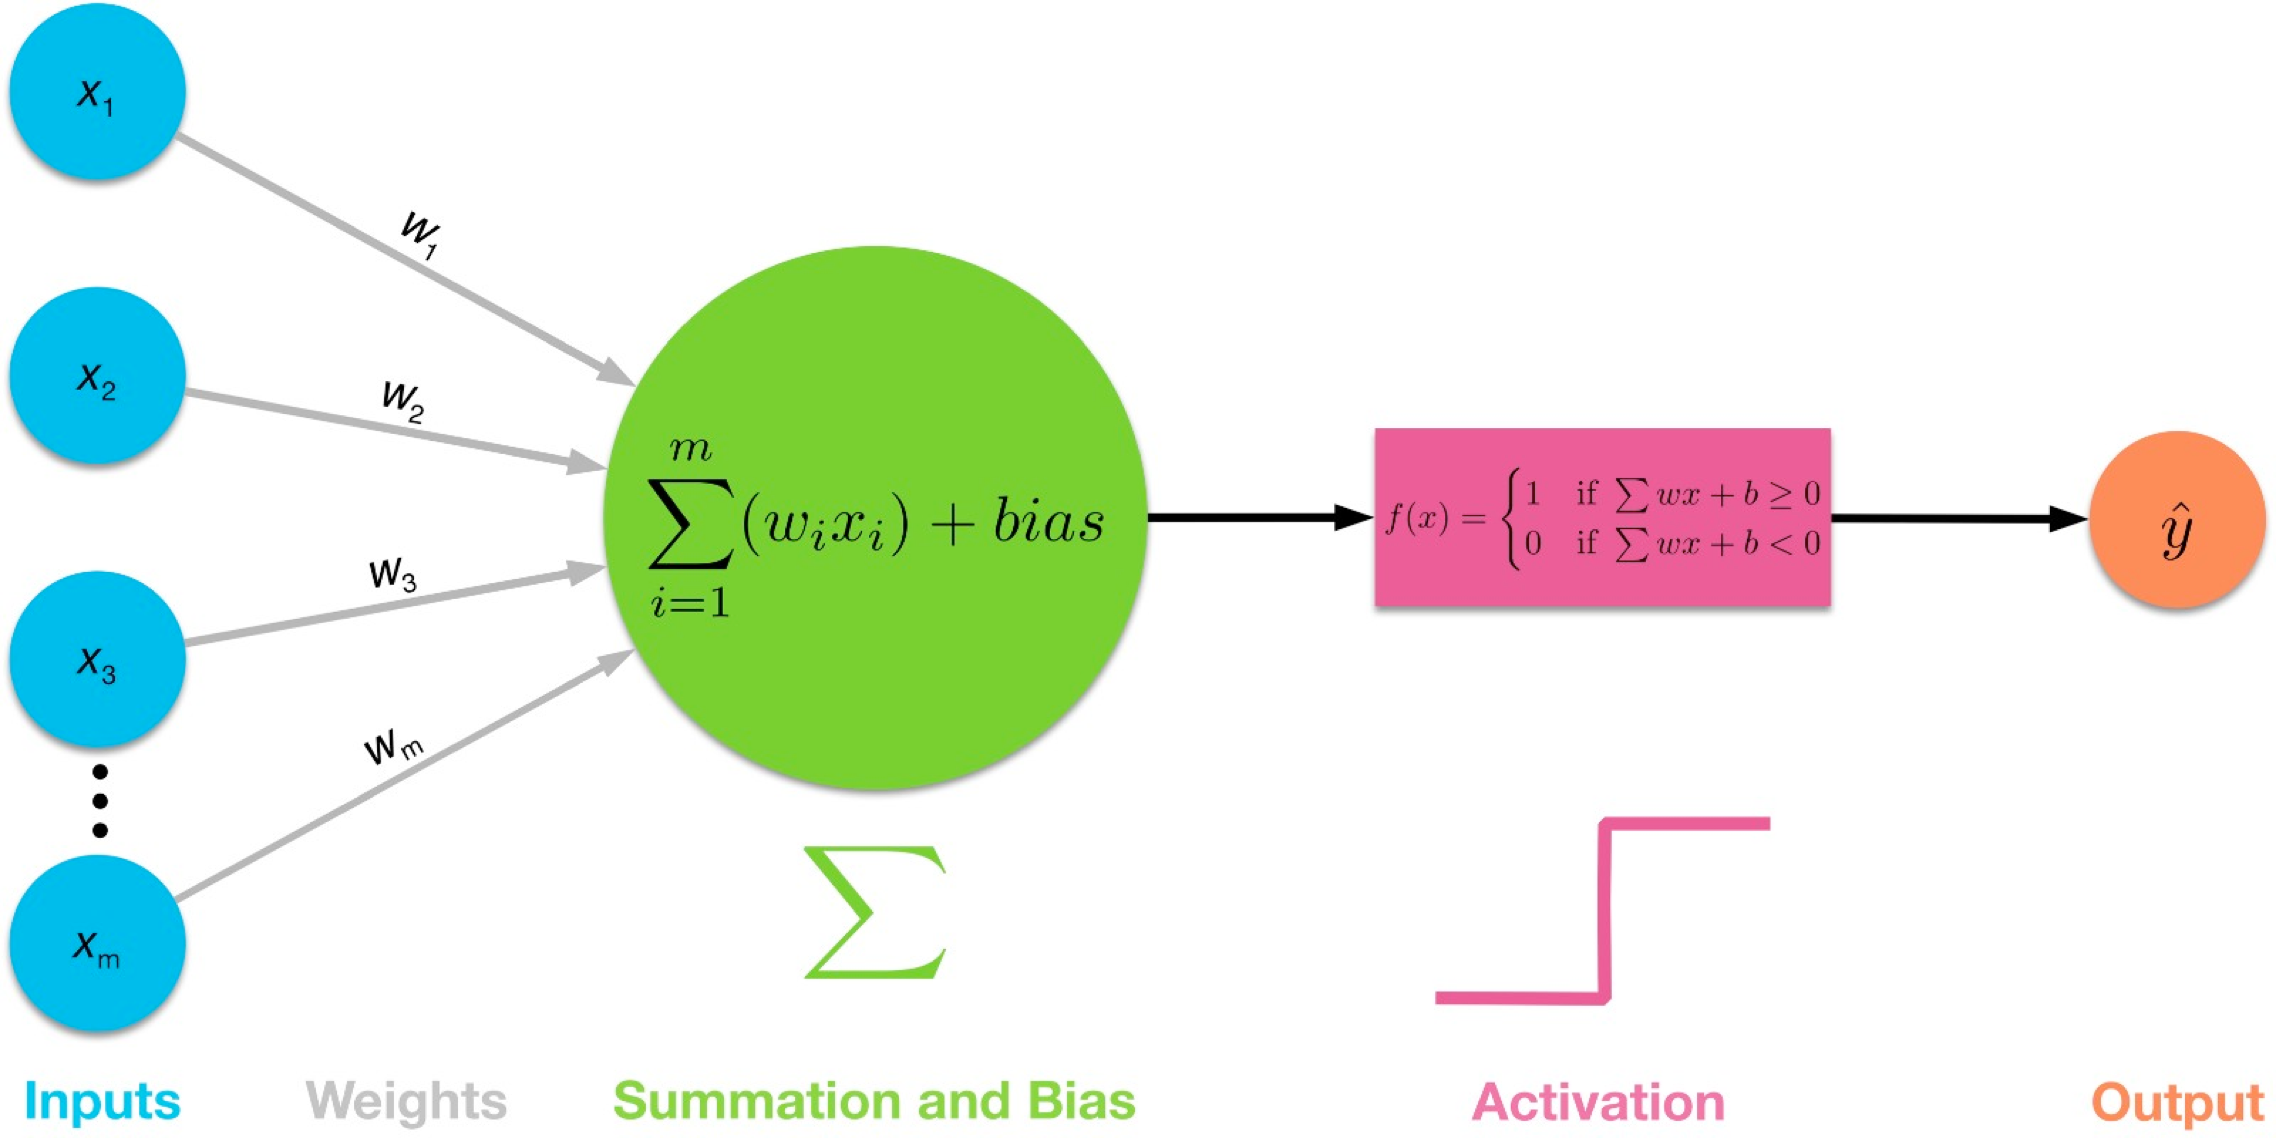


## Step 1: Development Environment

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
import os
os.getcwd()

## Step 2: Data Preparation

### Case 1

In [ ]:
data = 
weight = 
bias = 

In [ ]:
# create sum


In [ ]:
# create output


In [ ]:
print(createsum(data, weight, bias))

In [ ]:
output = getoutput(createsum(data, weight, bias))
output

### Case 2

In [ ]:
# load input data from diagnostic tests
data = np.loadtxt('/Users/tdi/Documents/Teaching/Data/data_perceptron.txt')

In [ ]:
data.shape

In [ ]:
# first two numbers are features, the last is a label
data

In [ ]:
# separate the features from the labels
X = data[:, 0:2]
print(X)

In [ ]:
y = data[:, -1]
print(y)

In [ ]:
# reshape the labels back to a column
n = len(data)
y = y.reshape(n,1)
print(y)

In [ ]:
# Visualise the data
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(projection='3d')
# Creating plot
ax.scatter3D(data[:, 0], data[:, 1], data[:, 2], color = "green")
plt.title("simple 3D scatter plot")
plt.grid()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## Building Perceptron


## Algorithm

X values are the _input_, y values are the _output_. We miss the weights of __X__ and the __bias__. <br>
We try to find such weights W that would ensure precise calculation of __y__.<br>

__Activation function__ calculates a value of firing the neuron: <br>
```activation = sum(wi * xi) + bias```
or for our perceptron
```activation = w1 * x1 + w2 * x2 + bias```

The __transfer function__ predicts the label<br>
```if activation >= 0.0 then prediction = 1.0 else prediction = 0.0```<br>

### Weights and Bias

In [ ]:
# We start with random initial weights and a bias
import random
w1 = random.random()
w2 = random.random()
W = [w1, w2]
W

In [ ]:
bias = random.random()
bias

### Activation Function
Perceptron is a binary classifier.

In [ ]:
# Define the activation function of a neuron as a dot product of two vectors plus the bias
# FX = b + X[0]*W[0] + X[1]*W[1]
def predict(X, W, b):   
    for i in range(len(X)):
        FX = b
        FX += X[i]*W[i]        
        if FX >= 0.0: 
            active = 1.0 
        else: 
            active = 0.0       
    return active

In [ ]:
# First prediction would be wrong
predict(X[0], W, bias)

### Error Control

If the calculated output is much different from the expectations, we come back and correct the weights. 
We use _Stochastic Gradient Descent_ approach to it (SGD).<br>

The method requires two parameters:
- __learning rate__ - limits the weight correction
- __number of iterations__ through the data

We reach the solution in iterations called __epochs__ - each iteration trying to reduce the inaccuracy of the predicted output.<br>

- after the first training iteration (epoch), an __error__ is estimated, the weights adjusted, and training repeated
- __learning_rate__ determines how fast we advance to the solution, adjusting the weights - configurable parameter<br>
```w = w + learning_rate * (expected_output - predicted_output) * x```<br>

The bias is like the intercept in the linear equation.

In [ ]:
# Define the training function, which will take care of correcting the errors
def train(X, y, l_rate, epochs):
    # initialisation
    # W = [0.0 for i in range(len(X[0]))]
    W = [random.random() for i in range(len(X[0]))]
    bias = random.random() 
    errors = []
    
    # Iterate through epochs with updated weights and bias
    for epoch in range(epochs):
        print('Epoch=%d' %(epoch))
        i=0
        # Loop over each row of the training data
        for row in X:
            print('\tRow=', row, 'W =', W, 'bias=', bias)
            y_predicted = predict(row, W, bias)
            
            # calculate the error as (expected - predicted)
            err = y[i] - y_predicted
            errors.append(err)
            print("\t\tExpected=%.3f, Predicted=%.3f, Error=%.6f" %(y[i], y_predicted, err))
            
            # Make corrections
            # update the bias
            bias += l_rate * err    
            
            # update the weights - loop over each weight in a row for updating it
            n = len(row)
            for j in range(n):
                W[j] += l_rate * err * row[j]
                
            # End of row        
            i+=1
        # End of epoch
    plot_errors(errors)
    return W, bias

In [ ]:
# Plot the errors
def plot_errors(errors):
    from pylab import ylim, plot
    from matplotlib import pyplot as plt

    ylim([-1,1])
    plot(errors)
    plt.show()

## Step 3: Training Perceptron
We apply the functions from above.

In [ ]:
# Set parameters
l_rate = 0.05
n_epoch = 20

In [ ]:
# Implement the activation function for each data row separately
weights, bias = train(X, y, l_rate, n_epoch)

In [ ]:
print('final', weights[0], weights[1], bias)

In [ ]:
# or
print(f"y = {weights[0]} * x1 + {weights[1]} * x2 + {bias}")

## Step 4: Test the Model

### Test with Known Data
e.g. one of our rows of data

In [ ]:
predicted = 0.89 * weights[0] + 0.55 * weights[1] + bias
predicted

In [ ]:
predicted = 0.38 * weights[0] + 0.19 * weights[1] + bias
predicted

Prediction is closer to 1 than to 0.

### Test With Unknown Data